import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('population.csv')
df = df.drop(labels='year', axis=1)

In [17]:
df

,population
0,50948272
1,51141463
2,51327916
3,51529338
4,51696216
5,51778544
6,51826059
7,51849861
8,51829023
9,51638809


각각의 검색량 그래프

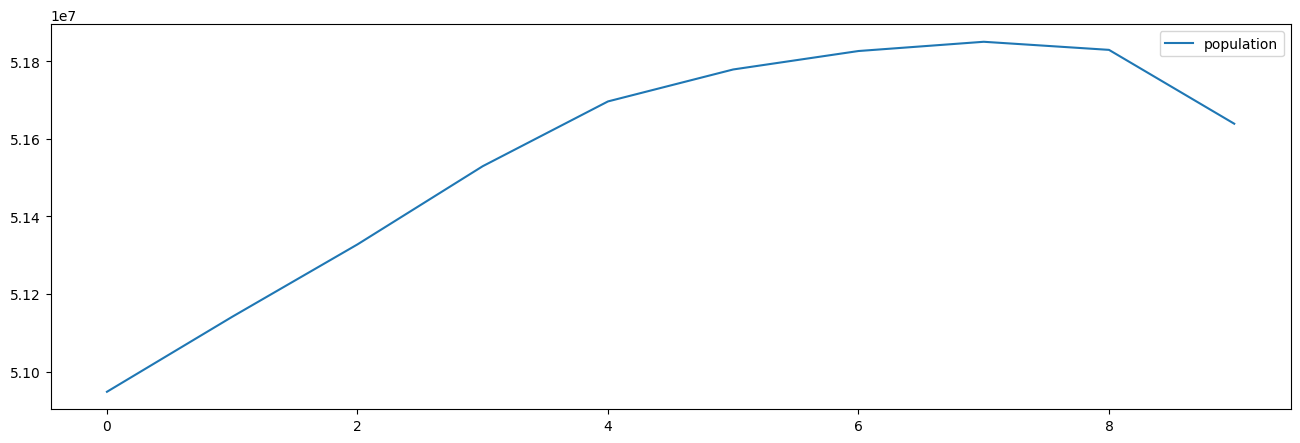

In [18]:
df.plot(figsize=(16, 5))
plt.show()

### 추세 분석
차수: DEG

의사역행렬을 이용하여 가장 가까운 해를 찾음

In [19]:
DEG = 4     # 12 이상은 안됨

In [21]:
a = np.matrix([
    [i**j for j in range(DEG+1)] for i in range(df['population'].size)
])

pop = np.matrix(df['population']).transpose()

a.shape

(10, 5)

In [22]:
pop

matrix([[50948272],
        [51141463],
        [51327916],
        [51529338],
        [51696216],
        [51778544],
        [51826059],
        [51849861],
        [51829023],
        [51638809]])

In [23]:
mp_inverse = np.linalg.pinv(a)
# mp_inverse = np.linalg.inv(a.transpose() * a) * a.transpose()
mp_inverse.shape

(5, 10)

In [24]:
mp_inverse.tolist()[0]

[0.9370629370630974,
 0.1748251748250795,
 -0.08741258741269761,
 -0.08741258741262468,
 4.008676498714074e-14,
 0.06293706293712976,
 0.052447552447586435,
 -0.01748251748255042,
 -0.06993006993013567,
 0.03496503496507422]

In [25]:
pop_coeff = np.matmul(mp_inverse, pop)

pop_coeff

matrix([[ 5.09431528e+07],
        [ 2.05952740e+05],
        [-5.56731935e+02],
        [-1.25571601e+03],
        [-2.82010489e+01]])

In [26]:
pop_poly = np.poly1d(pop_coeff.transpose().tolist()[0][::-1])

print(pop_poly)

       4        3         2
-28.2 x - 1256 x - 556.7 x + 2.06e+05 x + 5.094e+07


In [28]:
plot_x = np.linspace(0, df['population'].size-1, 300)

pop_y = [pop_poly(i) for i in plot_x]

In [30]:
pop_poly( df['population'].size-1)

51651188.11190074

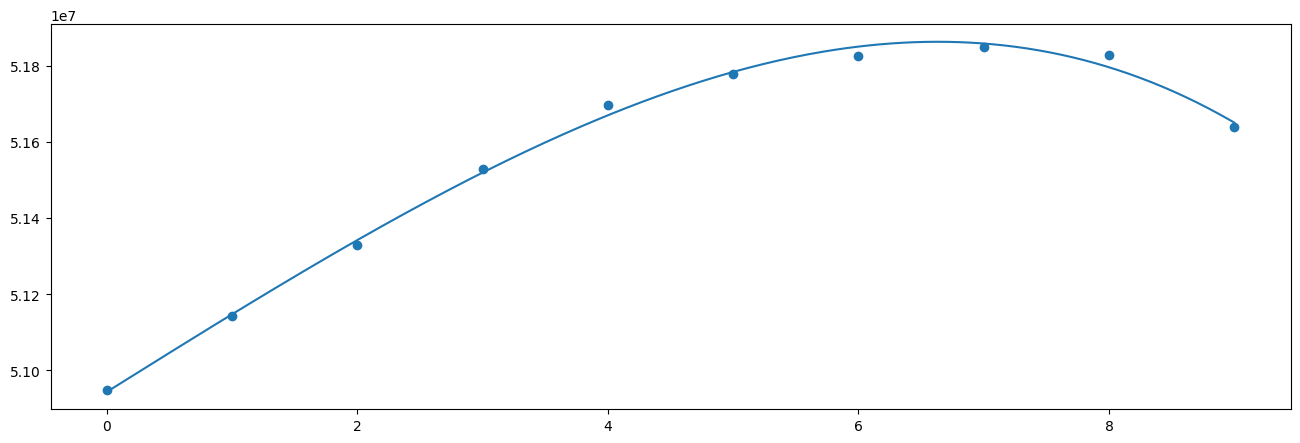

In [32]:
plt.figure(figsize=(16, 5))
plt.plot(plot_x, pop_y, label="bbq_trend")
plt.scatter([i for i in range(df['population'].size)], df['population'], label="population")
plt.show()